<a href="https://colab.research.google.com/github/Bokocki/135UM-Homework/blob/main/Homework07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment: Understanding Binary Cross-Entropy in the Forward Stagewise Procedure
-----------------------------

## The Problem

In this assignment, you will demonstrate that adding a new constant predictor in the forward stagewise procedure to an already existing predictor from a previous stage, $f_{m-1}(x_i)$ (which we will denote as $f_i$ for ease of notation), may be for certain loss functions fundamentally more challenging than building a constant predictor from scratch. You will work with the binary cross-entropy loss defined as

$$
L(y, z) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z)),
$$

where

- $y_i \in \{0,1\}$ are the binary labels,
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

For the purposes of this assignment, assume that you are given:

- A dataset of binary labels $y_i$.
- **Two constants: $m$ (the number of ones) and $k$ (the number of zeros)** in the labels in the dataset.
- A set of predictions $f_i = f_{m-1}(x_i)$ obtained from a previous stage, where the $f_i$ values are generated randomly from a normal distribution.

### The assignment will explore two scenarios:

### Scenario A: Fitting a Constant Predictor from Scratch

In this scenario, you are building a predictor from scratch. The task is to find the optimal constant value $\lambda$ that minimizes the binary cross-entropy loss over the dataset. Formulate the optimization problem as:

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda).
$$



### Scenario B: Fitting the m-th Predictor in the Forward Stagewise Procedure

Now assume you already have an existing predictor $f_i = f_{m-1}(x_i)$. Rather than predicting from scratch, you wish to find an optimal additive correction $\lambda$ such that the updated prediction for each data point becomes

$$
 f_i + \lambda,
$$

and the corresponding binary cross-entropy loss is given by

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$


## Research Questions

In this assignment you will answer the following questions:

- Why is finding an optimal additive shift $\lambda$ in the forward stagewise procedure fundamentally harder than directly fitting a single-parameter predictor from scratch?
- How does the complexity of the loss landscape differ between these two scenarios? Discuss the differences in the shape and smoothness of the loss function in both cases.

## Tasks & Deliverables

1. **Derivation and Analysis**

  **Scenario A:**
  - Derive explicitly the optimal $\lambda$ for fitting from scratch, i.e., solve
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda)
    $$
    
    and express the answer in terms of $m$ and $k$.
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Interpretation:**
  Provide a clear interpretation of your derived optimal $\lambda$. What does this constant represent in terms of the dataset's label distribution?

  **Scenario B:**
  - Derive the implicit equation that $\lambda$ must satisfy in the additive shift scenario:
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
    $$
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Discussion:**
    Explain clearly why this implicit equation has no simple closed-form solution, unlike the previous case. What role does the non-linearity of the sigmoid function (in the binary cross-entropy loss) play in this difficulty?

2. **Loss Landscape Exploration (Python)**

  Write a Python code that:

  - Uses provided values for $n$, and for $k$ and $m$ (the number of zeros and ones in the labels, respectively), $k+m=n$.
  - Generates a set of predictions $f_i$ by sampling from a normal distribution.
  - Plots the binary cross-entropy loss as a function of $\lambda$ for:
    - Scenario A:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, \lambda) \text{ as a function of }\lambda
      $$
    - Scenario B:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, f_i + \lambda) \text{ as a function of }\lambda
      $$
  - **Discussion:**
  Is the loss landscape in Scenario A simpler or more complex than in Scenario B? Is it multimodal or unimodal? If so, is it thinkable the lambda minimizer in Scenario B can be found numerically? Where does the difficulty in Scenario B come from: the non-linearity of the problem or a complex loss landscape?

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.

# Solution to homework
---
## Derivation and analysis

### Scenario A

In this scenario we want to find $\lambda$ such that the loss is the smallest
$$
\begin{align}
\sum_{i=1}^{n} L(y_i, \lambda) &= \sum_{i=1}^{n}[-y_i\log(\frac{1}{1+e^{-\lambda}})-(1-y_i)\log(1-\frac{1}{1+e^{-\lambda}})] \\
&= \log(1+e^{-\lambda})(\sum y_i)+\log(1+e^{\lambda})(n-\sum y_i).
\end{align}
$$
To find such $\lambda$, calculate the derivative with respect to $\lambda$ and equate to zero
$$
\frac{d}{d\lambda} \sum L(y_i, \lambda) = \frac{-e^{-\lambda}}{1+e^{-\lambda}} (\sum y_i) + \frac{e^{\lambda}}{1+e^{\lambda}}(n-\sum y_i) = 0.
$$
Solving that equation and noticing that $m+k=n$ we have
$$
\lambda^{*} = \log(\frac{\sum y_i}{n - \sum y_i}) = \log(\frac{m}{k}) = \log(\frac{m/n}{1-m/n}) = \sigma^{-1}(m/n).
$$
The last equation shows that the optimal $\lambda$ is equal to the log odds of the probability that an observation is $1$ in the dataset. Substituting back the optimal $\lambda$ into loss function we obtain
$$
\sum_{i=1}^{n} L(y_i, \lambda^{*}) = - \sum [y_i\log(m/n)+(1-y_i)\log(1-m/n)]
$$
which is the log-loss.

### Scenario B

In this scenario we want to find $\lambda$ such that the loss is the smallest
$$
\begin{align}
\sum_{i=1}^{n} L(y_i, f_i + \lambda) &= \sum_{i=1}^{n}[-y_i\log(\frac{1}{1+e^{-\lambda-f_i}})-(1-y_i)\log(1-\frac{1}{1+e^{-\lambda-f_i}})] \\
&= \sum y_i \log(1+e^{-\lambda-f_i}) + \sum (1-y_i)\log(1+e^{\lambda+f_i}).
\end{align}
$$
To find such $\lambda$, calculate the derivative with respect to $\lambda$ and equate to zero
$$
\begin{align}
\frac{d}{d\lambda} \sum L(y_i, f_i + \lambda) &= \sum y_i \frac{-e^{-\lambda-f_i}}{1+e^{-\lambda-f_i}} + \sum (1 - y_i) \frac{e^{\lambda+f_i}}{1+e^{\lambda+f_i}} \\
&= \sum \frac{(1-y_i)e^{\lambda+f_i}-y_i}{1+e^{\lambda+f_i}} \\
&= \sum \sigma(\lambda+f_i) - \sum y_i = 0.
\end{align}
$$
Since $\sum y_i = m$ that leads us to equation
$$
\sum \sigma(\lambda+f_i) = m.
$$
That equation cannot be solved explicitly, here the crucial problem is with nonlinearity of $\sigma(\cdot)$ function. If $\sigma$ was linear we could solve the equation explicitly
$$
\begin{align}
\sum \sigma(\lambda+f_i) &= m \\
\sum [\sigma(\lambda) + \sigma(f_i)] &= m \\
n \sigma(\lambda) &= m - \sigma(\sum f_i) \\
\lambda^{*} &= \sigma^{-1} (\frac{m - \sigma(\sum f_i)}{n}).
\end{align}
$$

## Loss landscape

Optimal λ for Scenario A: 0.4055
Approximate optimal λ for Scenario B: 0.5102


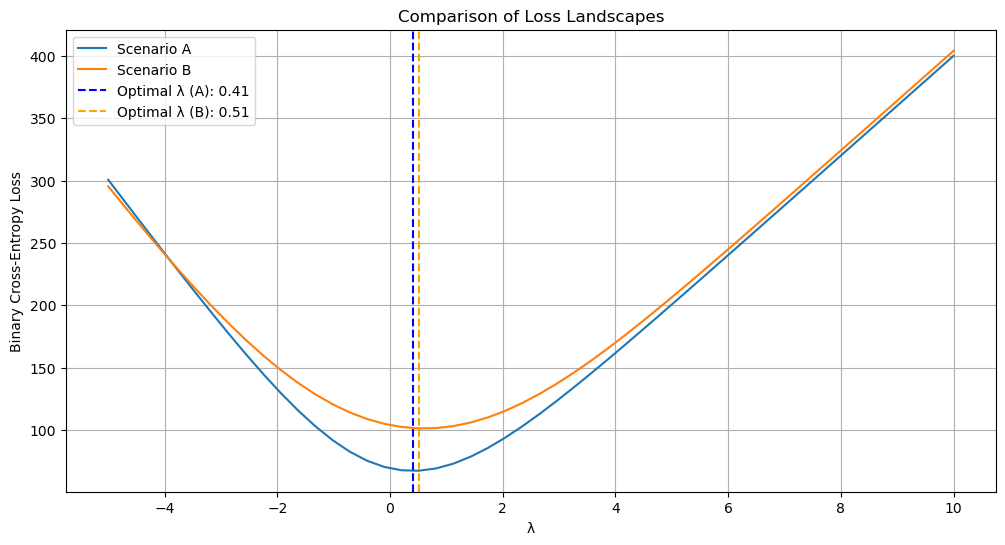

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y, z):
    return - (y * np.log(sigmoid(z)) + (1-y) * np.log(1-sigmoid(z)))

# Parameters
n = 100
m = 60  # number of ones
k = 40  # number of zeros
y = np.random.permutation(np.concatenate([np.ones(m), np.zeros(k)]))

# Generate random f_i values
f = np.random.normal(0, 2, n)

# Lambda range for plotting
lambda_vals = np.linspace(-5, 10, 50)

# Scenario A
loss_A = [np.sum(binary_cross_entropy(y, lam)) for lam in lambda_vals]

# Scenario B
loss_B = [np.sum(binary_cross_entropy(y, f + lam)) for lam in lambda_vals]

# Find optimal lambda for Scenario A (analytical solution)
optimal_lambda_A = np.log(m/k)
print(f"Optimal λ for Scenario A: {optimal_lambda_A:.4f}")

# Find optimal lambda for Scenario B (numerical approximation)
min_idx = np.argmin(loss_B)
optimal_lambda_B = lambda_vals[min_idx]
print(f"Approximate optimal λ for Scenario B: {optimal_lambda_B:.4f}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lambda_vals, loss_A, label='Scenario A')
plt.plot(lambda_vals, loss_B, label='Scenario B')

# Add vertical lines for optimal lambdas
plt.axvline(x=optimal_lambda_A, color='blue', linestyle='--', 
            label=f'Optimal λ (A): {optimal_lambda_A:.2f}')
plt.axvline(x=optimal_lambda_B, color='orange', linestyle='--', 
            label=f'Optimal λ (B): {optimal_lambda_B:.2f}')

plt.xlabel('λ')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Comparison of Loss Landscapes')
plt.legend()
plt.grid(True)
plt.show()